In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,MALE
140,Adelie,Dream,40.2,17.1,193.0,3400.0,FEMALE
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,MALE
161,Chinstrap,Dream,51.3,19.9,198.0,3700.0,MALE
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,FEMALE
37,Adelie,Dream,42.2,18.5,180.0,3550.0,FEMALE
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,MALE
49,Adelie,Dream,42.3,21.2,191.0,4150.0,MALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df1 = df.dropna()

In [8]:
df1.shape

(334, 7)

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = label.fit_transform(df1[col])

C:\Users\bisho\AppData\Local\Temp\ipykernel_2564\2287626034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label.fit_transform(df1[col])
C:\Users\bisho\AppData\Local\Temp\ipykernel_2564\2287626034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label.fit_transform(df1[col])
C:\Users\bisho\AppData\Local\Temp\ipykernel_2564\2287626034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

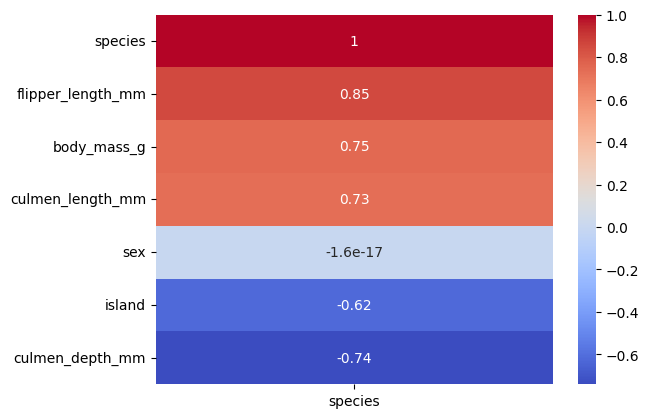

In [10]:
corr = df1.corr()
sns.heatmap( corr[['species']].sort_values(by='species' , ascending=False) , annot = True , cmap = 'coolwarm' )
plt.show()

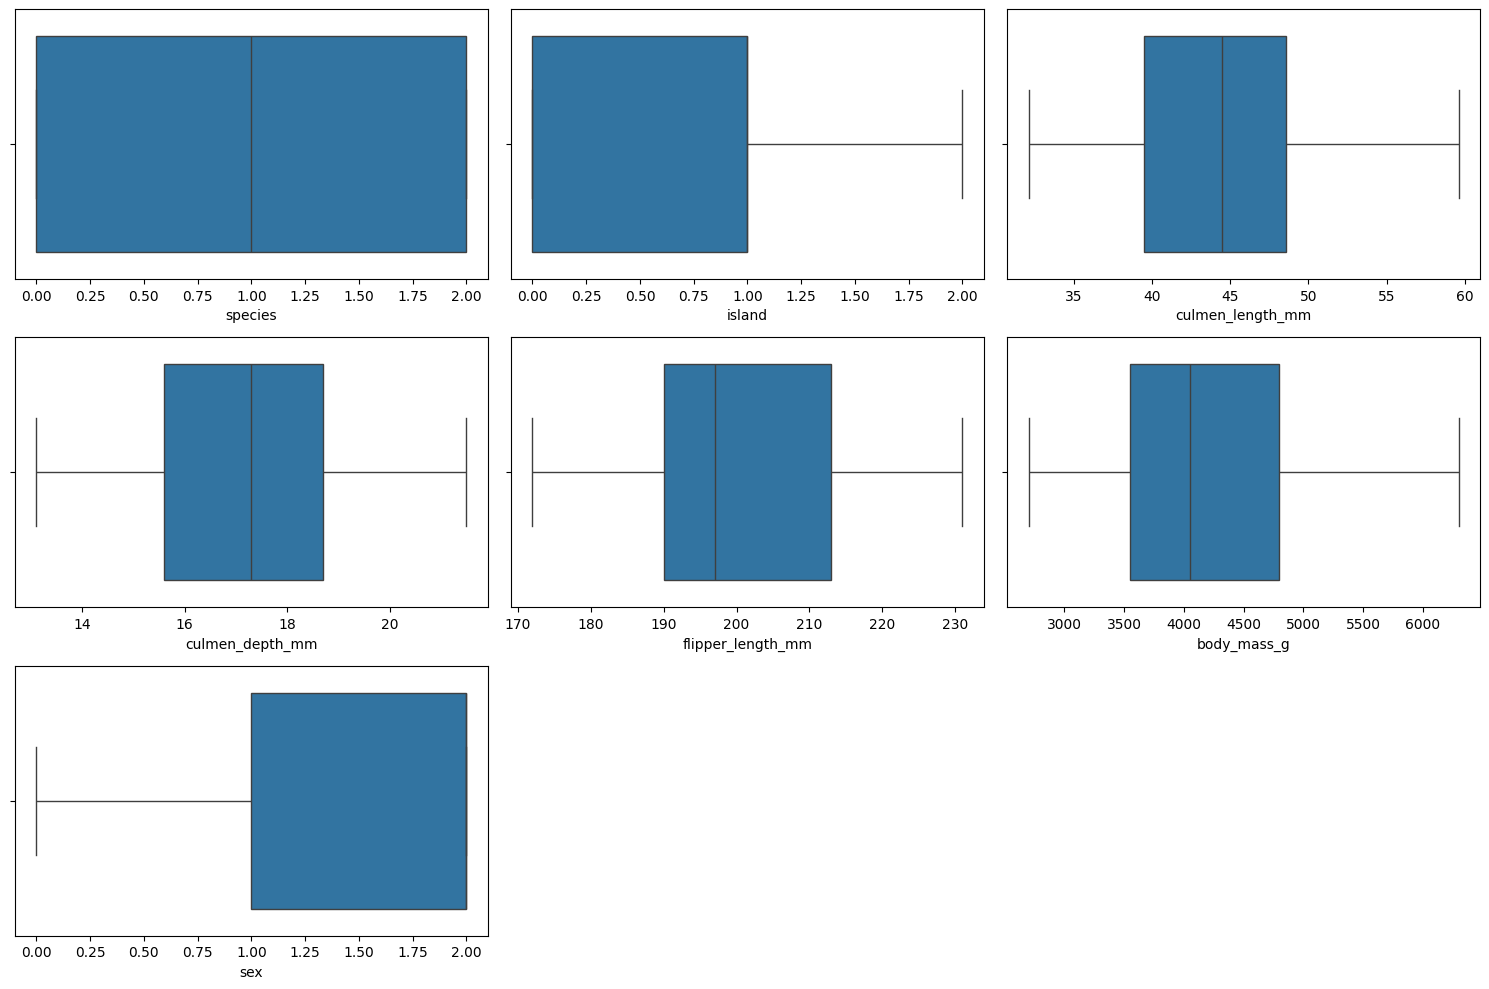

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = 3
n_rows = math.ceil(len(df1.columns) / n_cols)

plt.figure(figsize=(15, 10))

for i, col in enumerate(df1.columns, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.boxplot(x=df1[col])

plt.tight_layout()
plt.show()
# 1 2 3 4 5 6 7 8 9 10 70
# Q1 => 3 , Q3 => 8 , Q2 => 5.5
# IQR = Q3 - Q1 = 8 - 3 = 5
# Q1 - 1.5 * IQR > data > Q3 + 1.5 * IQR
# 10.5 <= Not_Outliers <= -0.5

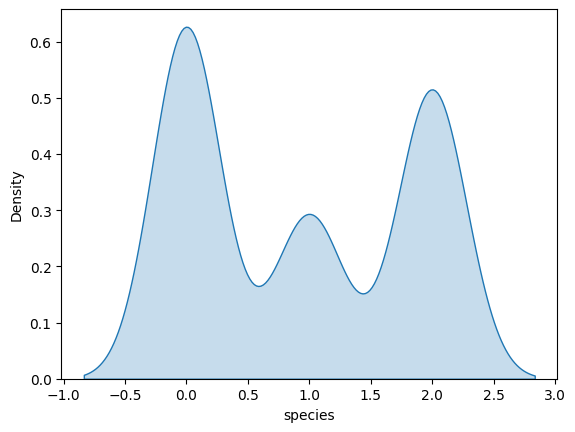

In [12]:
sns.kdeplot(df1['species'] , fill=True)
plt.show()

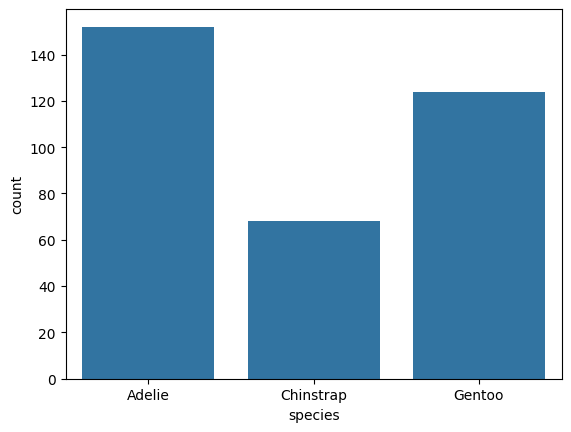

In [13]:
sns.countplot(x=df['species'])
plt.show()

In [14]:
X = df1.drop('species' , axis=1)
y = df1['species']

In [15]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_scaled = st.fit_transform(X)
X = X_scaled

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models = {
    'Logestic Regression' : {
        'Model' : LogisticRegression(),
        'para' : {
            'C' : [0.1,1,10],
            'max_iter' : [100,300,500]
        }
    },
    'KNN' : {
        'Model' : KNeighborsClassifier(),
        'para' : {
            'n_neighbors' : [3,7]
        }
    },
    'Tree' : {
        'Model' : DecisionTreeClassifier(),
        'para' : {
            'max_depth' : [5,10]
        }
    },
    'Random Forest' : {
        'Model' : RandomForestClassifier(),
        'para' : {
            'n_estimators' : [50,100]
        }
    },
    'SVM' : {
        'Model' : SVC(),
        'para' : {
            'C' : [0.1,1],
            'kernel' : ['rbf' , 'linear']
        }
    }
}

In [18]:
from sklearn.model_selection import cross_val_score , GridSearchCV
scores = []
for name , model in models.items():
    sc = GridSearchCV(model['Model'] , param_grid=model['para'] ,cv=5)
    sc.fit(X_train,y_train)
    scores.append({
            'Model' : name,
            'Best Score' : sc.best_score_,
            'Best Paramater' : sc.best_params_
        })

In [19]:
scores = pd.DataFrame(scores)
scores

,Model,Best Score,Best Paramater
0,Logestic Regression,0.992523,"{'C': 1, 'max_iter': 100}"
1,KNN,0.992523,{'n_neighbors': 7}
2,Tree,0.970161,{'max_depth': 5}
3,Random Forest,0.992523,{'n_estimators': 100}
4,SVM,0.992523,"{'C': 0.1, 'kernel': 'linear'}"


In [20]:
model = LogisticRegression(max_iter=300 , C=10)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=300)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

100.0

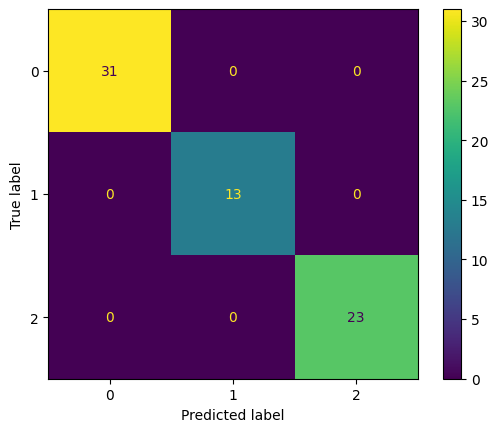

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [24]:
model = DecisionTreeClassifier(max_depth=5 , random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)*100

100.0

In [29]:
model.score(X_train,y_train)*100

99.625468164794

In [30]:
model.score(X_test,y_test)*100

100.0

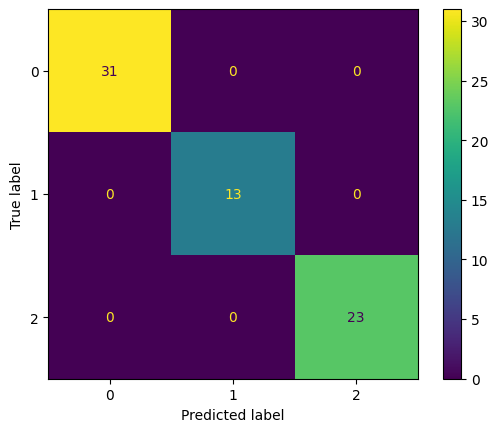

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

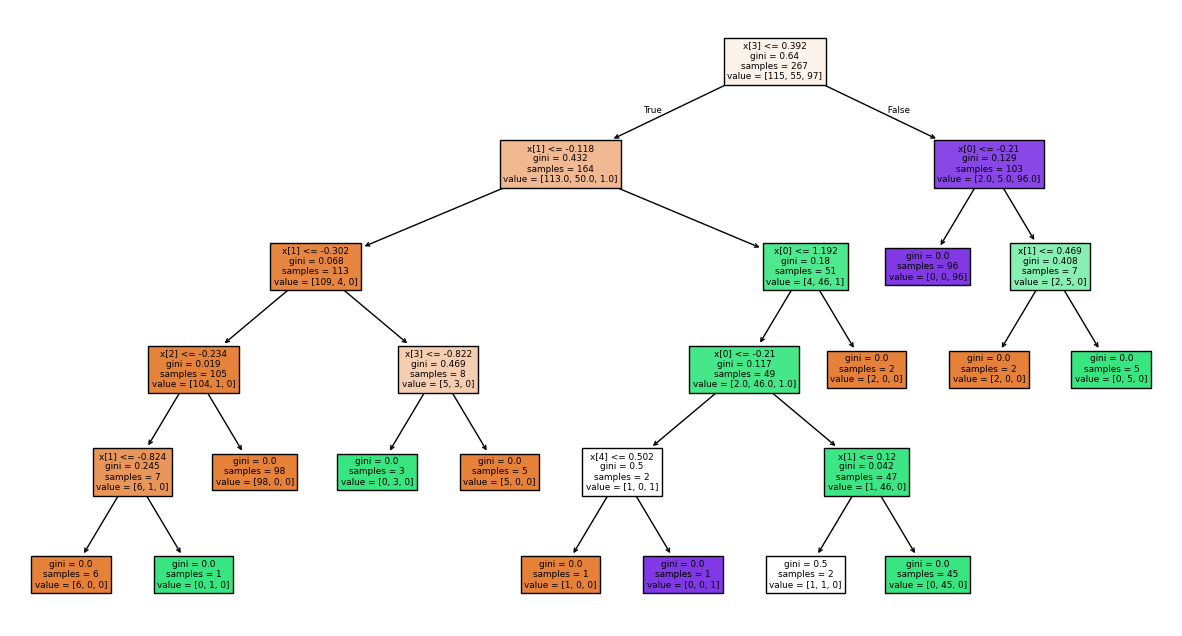

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
plot_tree(model , filled=True)
plt.show()
